<a href="https://colab.research.google.com/github/analyticalaq/Geo-sales-Data-Analysis-using-python/blob/main/GEO_sales_data_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
data = pd.read_csv('/content/Geo Sales.csv')
data = data.dropna(how='all') # Remove blank rows
data = data.dropna(subset=['Country', 'State', 'City']) # Remove rows with missing location data

In [ ]:
# Remove any leading/trailing whitespace from column values
data['Country'] = data['Country'].str.strip()
data['State'] = data['State'].str.strip()
data['City'] = data['City'].str.strip()

# Replace any remaining missing values with 'Unknown'
data = data.fillna('Unknown')

In [ ]:
# Aggregate total sales by country
country_sales = data.groupby('Country')['SalesAmount'].sum().reset_index()

# Create a choropleth map
world_map = folium.Map()
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json',
    name='Choropleth',
    data=country_sales,
    columns=['Country', 'SalesAmount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales'
).add_to(world_map)

world_map

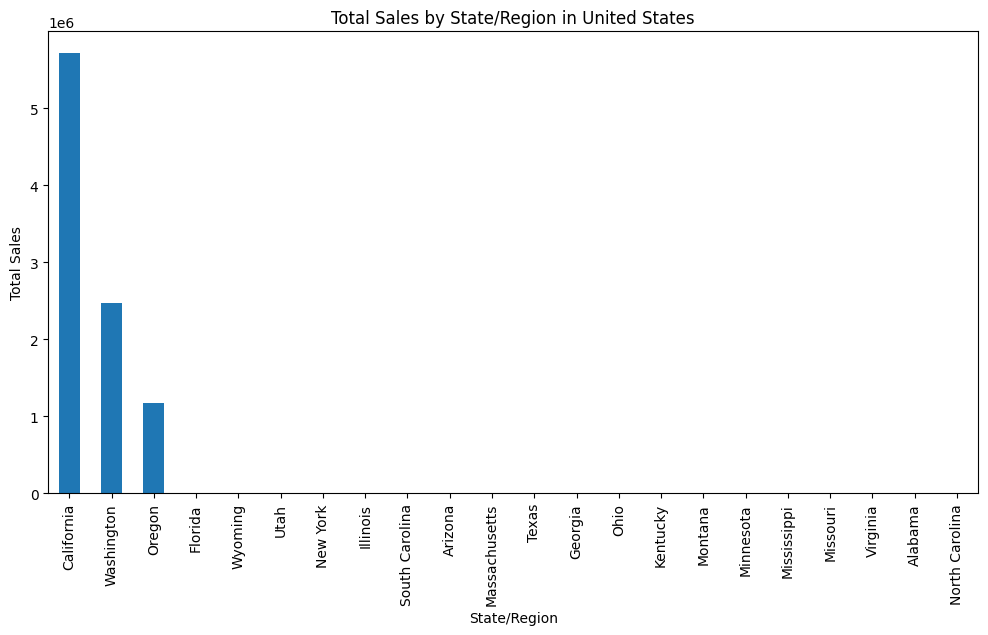

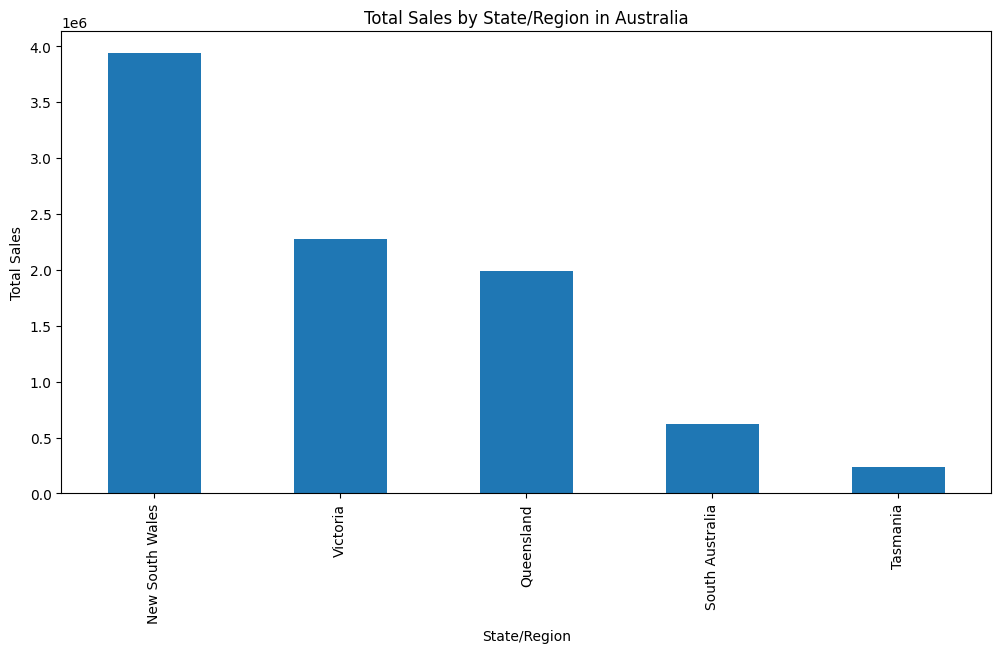

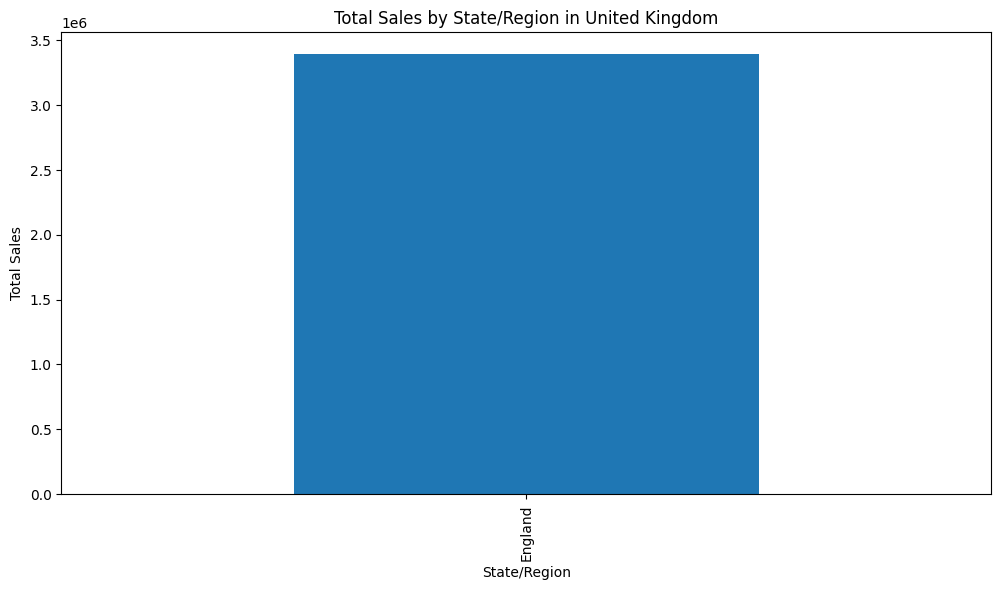

In [ ]:
# Identify the top 3 countries by total sales
top_countries = data.groupby('Country')['SalesAmount'].sum().sort_values(ascending=False).head(3).index

# Create a bar chart for each of the top countries
for country in top_countries:
    fig, ax = plt.subplots(figsize=(12, 6))
    country_data = data[data['Country'] == country]
    state_sales = country_data.groupby('State')['SalesAmount'].sum().sort_values(ascending=False)
    state_sales.plot(kind='bar', ax=ax)
    ax.set_title(f'Total Sales by State/Region in {country}')
    ax.set_xlabel('State/Region')
    ax.set_ylabel('Total Sales')
    plt.show()

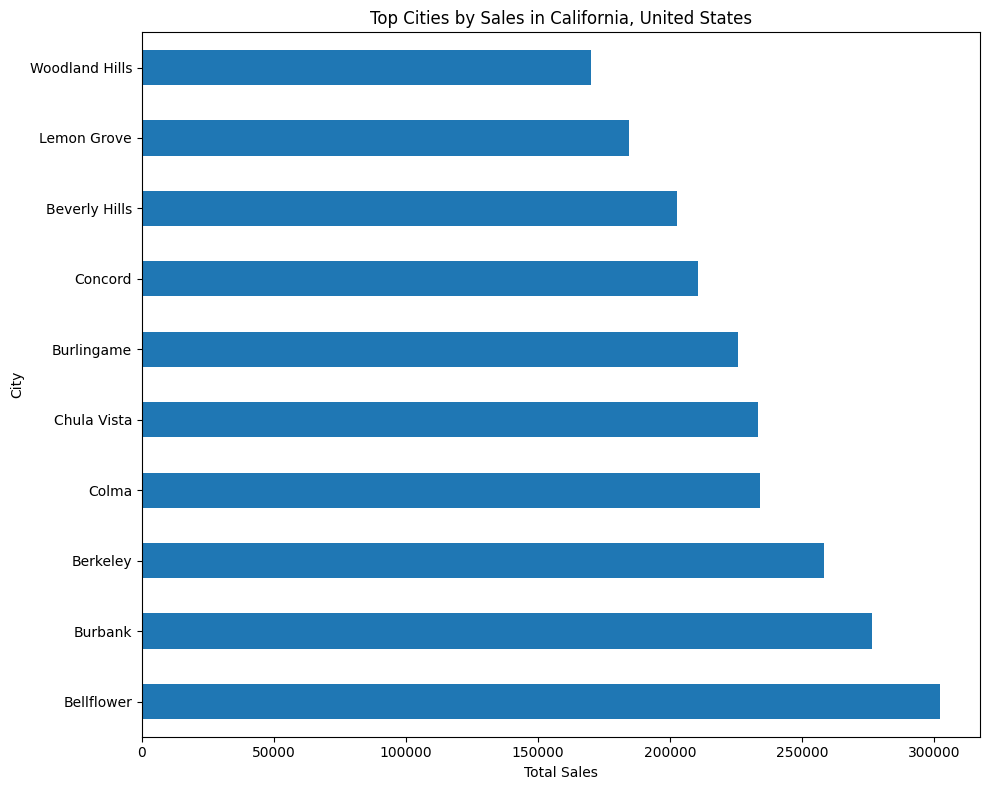

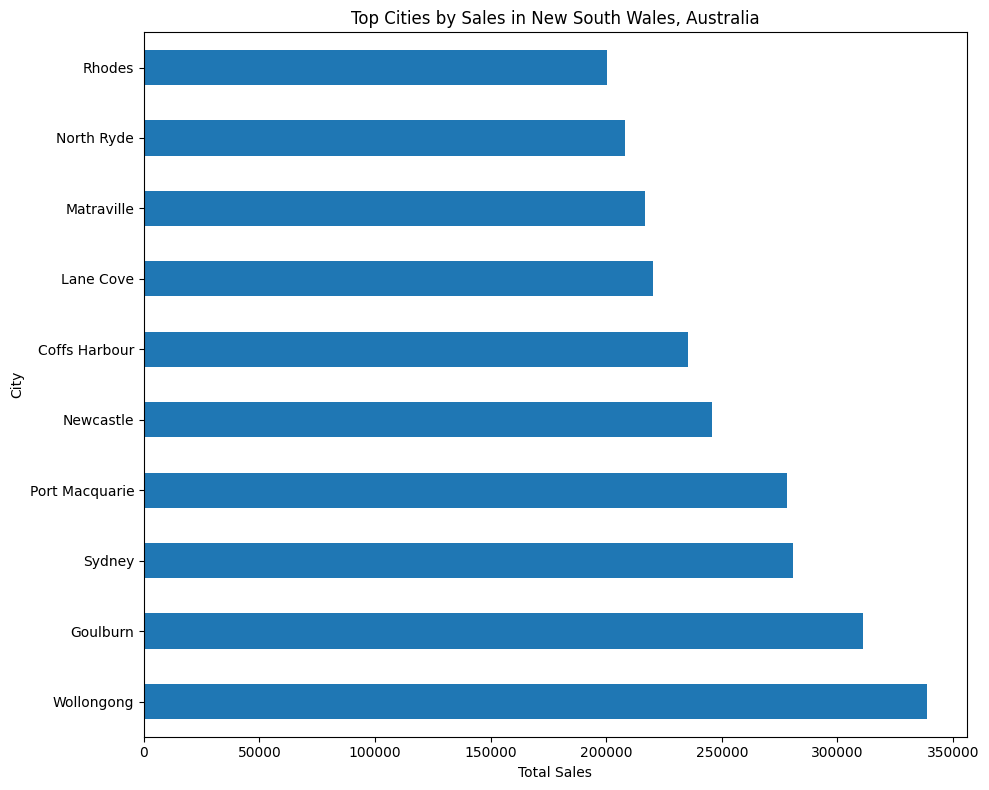

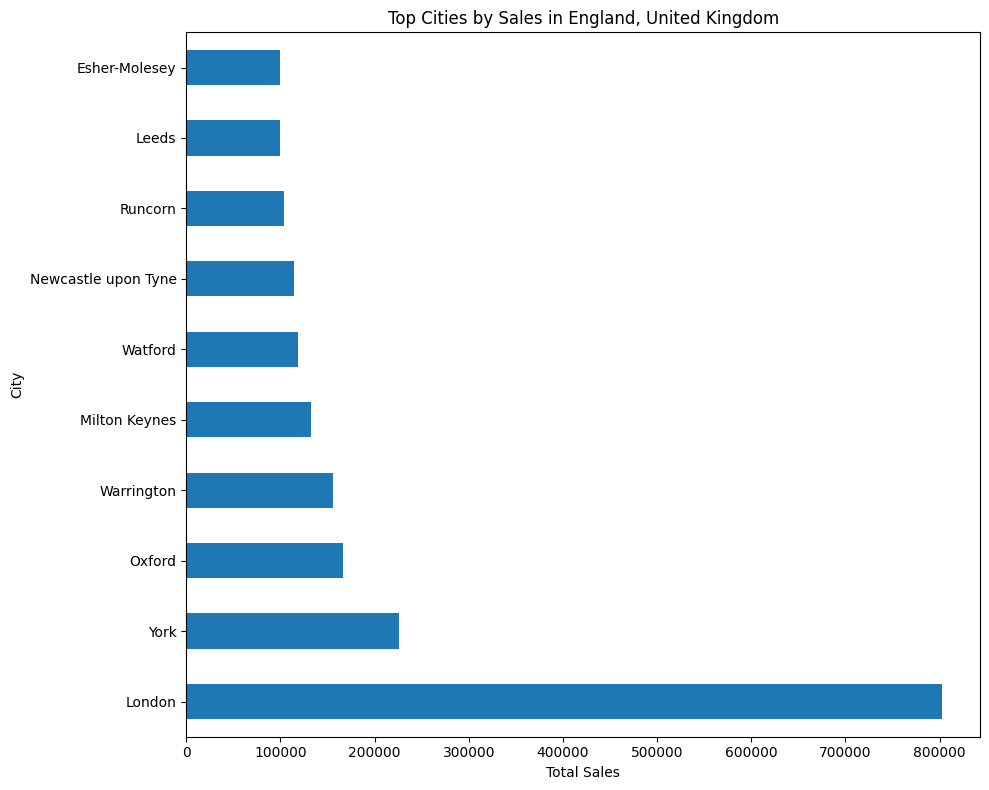

In [ ]:
# Identify the top 3 states/regions by total sales for the top countries
top_states = []
for country in top_countries:
    country_data = data[data['Country'] == country]
    top_state = country_data.groupby('State')['SalesAmount'].sum().sort_values(ascending=False).index[0]
    top_states.append((country, top_state))

# Create a horizontal bar chart for each of the top states/regions
for country, state in top_states:
    fig, ax = plt.subplots(figsize=(10, 8))
    state_data = data[(data['Country'] == country) & (data['State'] == state)]
    city_sales = state_data.groupby('City')['SalesAmount'].sum().sort_values(ascending=False).head(10)
    city_sales.plot(kind='barh', ax=ax)
    ax.set_title(f'Top Cities by Sales in {state}, {country}')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel('City')
    plt.tight_layout()
    plt.show()

In [ ]:
import folium
from folium import features

# Aggregate total sales by country
country_sales = data.groupby('Country')['SalesAmount'].sum().reset_index()

# Create a choropleth map with custom styling
world_map = folium.Map(tiles='cartodbpositron', location=[30, 0], zoom_start=2)
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json',
    name='Choropleth',
    data=country_sales,
    columns=['Country', 'SalesAmount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales',
    highlight=True,
    line_color='black',
    line_weight=0.5,
).add_to(world_map)

# Add custom legend
colormap = folium.branca.colormap.LinearColormap(
    colors=['yellow', 'red'],
    vmin=country_sales['SalesAmount'].min(),
    vmax=country_sales['SalesAmount'].max(),
    caption='Total Sales'
)
colormap.add_to(world_map)

# Customize layout
folium.LayerControl().add_to(world_map)
folium.map.Marker(
    location=[40, -100],
    icon=folium.Icon(icon='info-sign', color='green'),
    popup='Total Sales by Country',
).add_to(world_map)

# Display the map
world_map

<ipython-input-9-4f11f1f5ff10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues', ax=ax)
<ipython-input-9-4f11f1f5ff10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues', ax=ax)
<ipython-input-9-4f11f1f5ff10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues', ax=ax)


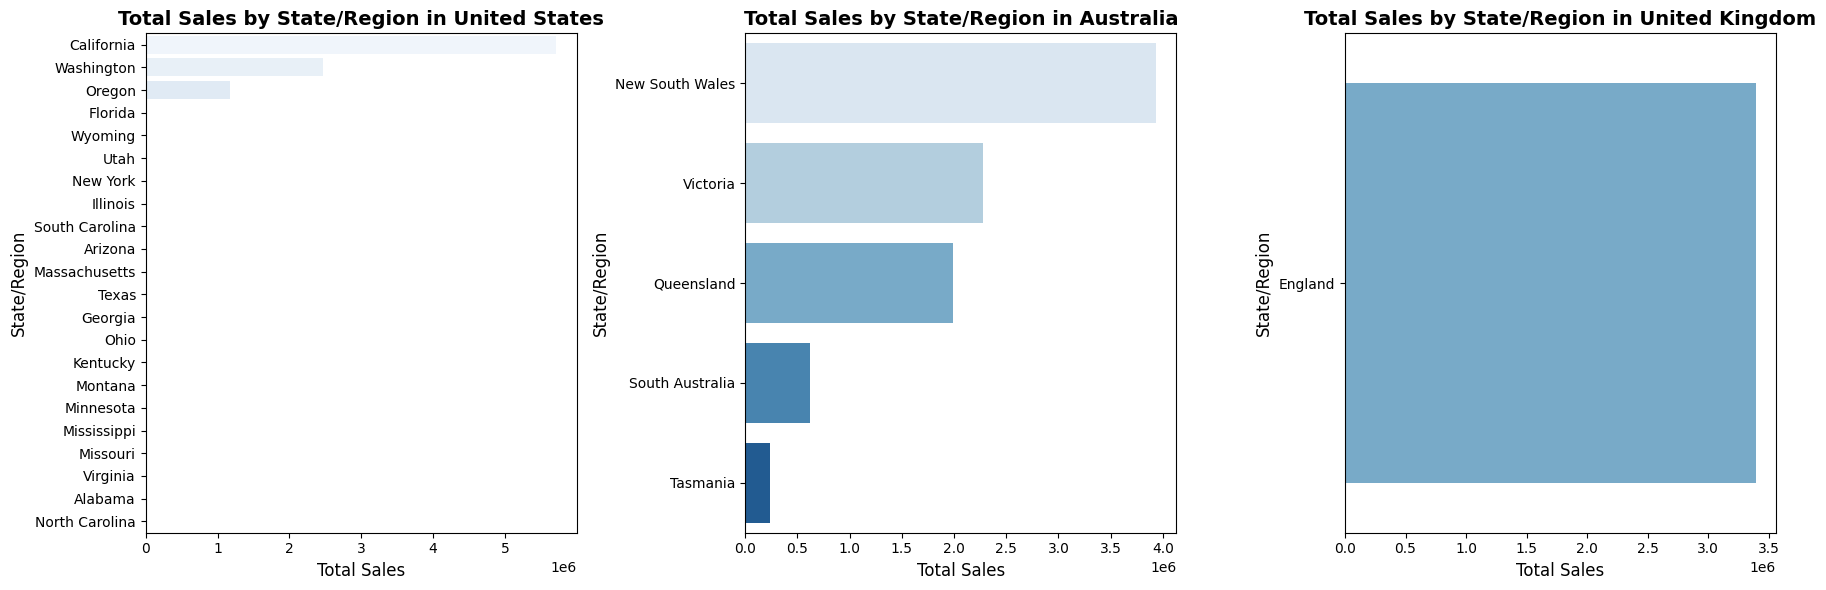

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 3 countries by total sales
top_countries = data.groupby('Country')['SalesAmount'].sum().sort_values(ascending=False).head(3).index

# Create a horizontal bar chart for each of the top countries
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for idx, country in enumerate(top_countries):
    country_data = data[data['Country'] == country]
    state_sales = country_data.groupby('State')['SalesAmount'].sum().sort_values(ascending=False)
    ax = axes[idx]
    sns.barplot(x=state_sales.values, y=state_sales.index, palette='Blues', ax=ax)
    ax.set_title(f'Total Sales by State/Region in {country}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Total Sales', fontsize=12)
    ax.set_ylabel('State/Region', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-10-9afba3701a8a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='Greens', ax=ax)
<ipython-input-10-9afba3701a8a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='Greens', ax=ax)
<ipython-input-10-9afba3701a8a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='Greens', ax=ax)


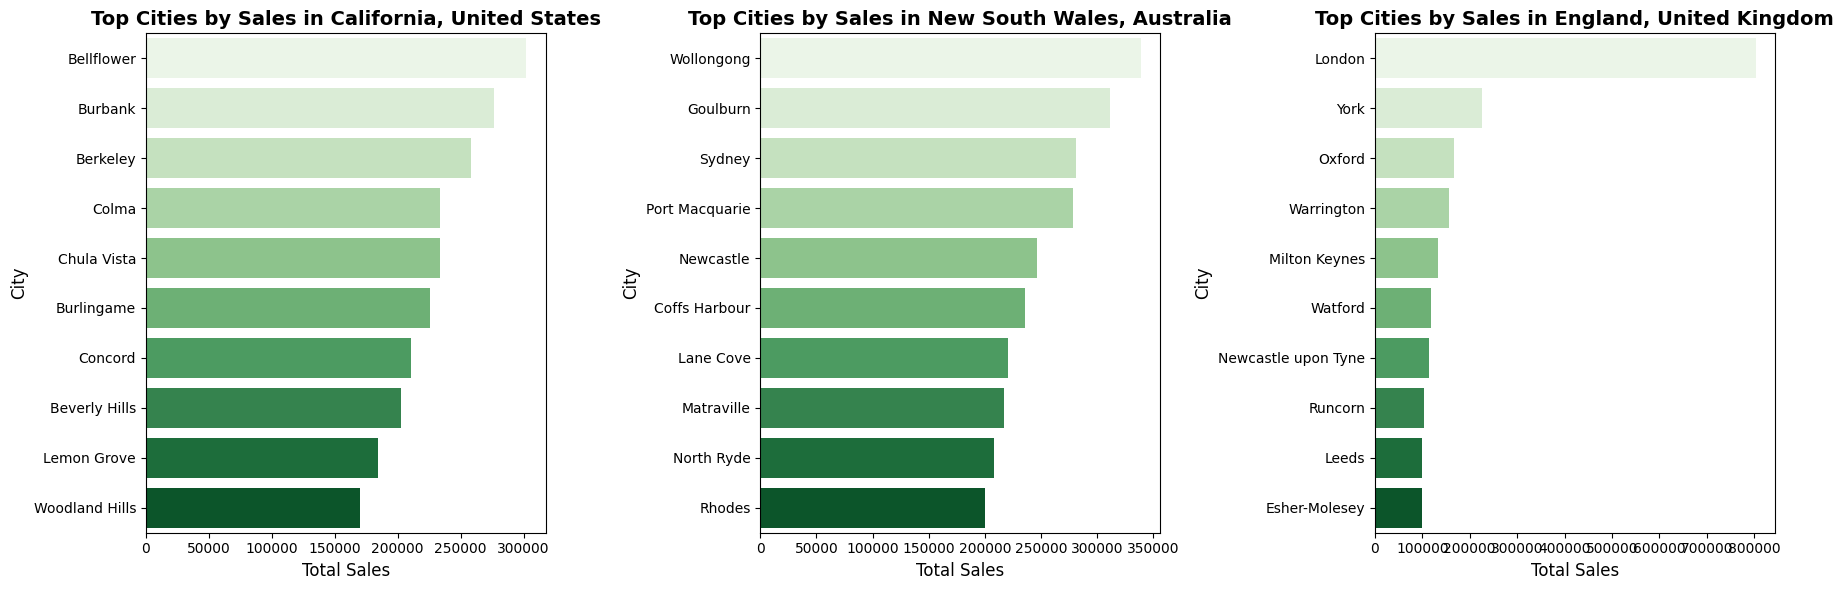

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 3 states/regions by total sales for the top countries
top_states = []
for country in top_countries:
    country_data = data[data['Country'] == country]
    top_state = country_data.groupby('State')['SalesAmount'].sum().sort_values(ascending=False).index[0]
    top_states.append((country, top_state))

# Create a horizontal bar chart for each of the top states/regions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for idx, (country, state) in enumerate(top_states):
    state_data = data[(data['Country'] == country) & (data['State'] == state)]
    city_sales = state_data.groupby('City')['SalesAmount'].sum().sort_values(ascending=False).head(10)
    ax = axes[idx]
    sns.barplot(x=city_sales.values, y=city_sales.index, palette='Greens', ax=ax)
    ax.set_title(f'Top Cities by Sales in {state}, {country}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Total Sales', fontsize=12)
    ax.set_ylabel('City', fontsize=12)

plt.tight_layout()
plt.show()